# **Aprendizado Supervisionado**

Em geral, o aprendizado supervisionado se divide em duas categorias: regressão e classificação:

- **Regressão**: modelos treinandos para prever uma *variável contínua*, geralmente para identificar um VALOR que melhor se relacione com as características apresentadas (prever um valor contínuo a partir de uma entrada de dados);

- **Classificação**: modelos treinados para prever uma *variável discreta*, geralmente para identificar a qual CATEGORIA ou conjunto de categorias aquela observação pertence (prever a classe a partir de uma entrada de dados).

##**Dataset**
 Um conjunto de dados para treinamento. Este conjunto geralmente é composto de duas partes:

 - 1 Atributos: são as colunas que servirão de base para que o modelo possa chegar na resposta (idade, localização geográfica, renda, preço, etc..)

 - 2 Rótulos: geralmente uma coluna que representa a resposta esperada para um conjunto de características (categorias, valores a serem estimados, etc...)



##**Treinamento**

O método **fit** em geral aceita dois parâmetros em formato *numpy* ou similar.

- **X**: amostras para treinamento/características (em geral matrizes são representadas por letras maiúsculas).

- **y**: respostas para treinamentos/rótulos (em geral arrays são representados por letras minúsculas).

# **Regressão Linear Simples**

Na **regressão linear** pressupõe-se que as variáveis dependente e independente tenha uma relação linear, ou seja, num formato de linha, onde ambas crescem na mesma *proporção*. Quando alimentados o modelo com variáveis independentes (atributos) e variáveis dependentes (classes), esse mesmo modelo busca encontrar uma equação linear (y=ax+b) que descreva a relação entre a variável dependente **(y)** e a(s) variável(eis) independente(s) **(x)**.

**Visualizando na prática**

In [ ]:
# Importando a biblioteca Pandas para criar o DataFrame com as variáveis independentes e dependentes
import pandas as pd

In [ ]:
# Criando um DataFrame para treinar o modelo

df = pd.DataFrame({
    'cerveja': [2,3,1,5,7,0], # quantidade de cervejas compradas (variável independente)
    'valor_total': [20,30,10,50,70,0] # valor pago do consumo das cervejas (variável dependente)
})

df

,cerveja,valor_total
0,2,20
1,3,30
2,1,10
3,5,50
4,7,70
5,0,0


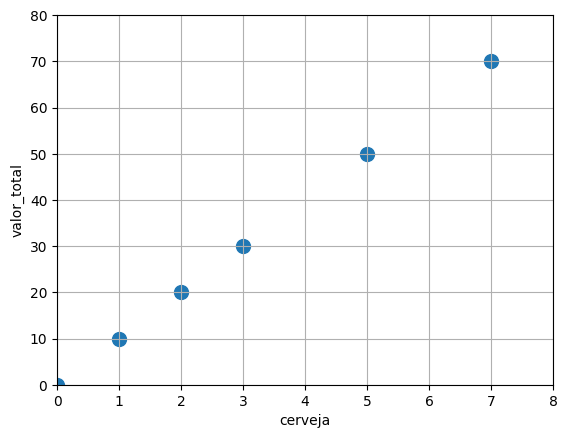

In [ ]:
# Visualizando (plotando) os dados acima em um gráfico de dispersão

df.plot(
    kind='scatter', # tipo do gráfico
    x='cerveja', # eixo x
    y='valor_total', # eixo y
    xlim=[0,8], # limite de valores do eixo x
    ylim=[0,80], # limites de valores do eixo y
    grid=True, # ativando linhas de grade
    s=100, # definindo tamanho dos pontos

);

In [ ]:
# Separando os dados em atributos e rótulos
atributos = df['cerveja'].to_frame()
rotulos = df['valor_total'].to_frame()
atributos, rotulos

(   cerveja
 0        2
 1        3
 2        1
 3        5
 4        7
 5        0,
    valor_total
 0           20
 1           30
 2           10
 3           50
 4           70
 5            0)

In [ ]:
# Importando o método LinearRegression da biblioteca sklearn para encontrar a fórmula da reta
from sklearn.linear_model import LinearRegression

In [ ]:
# Definindo o modelo LinearRegression na variável modelo
modelo = LinearRegression()
modelo

LinearRegression()

In [ ]:
# Treinando o modelo com os dados de atributos e rotulos através do método fit
modelo.fit(atributos, rotulos)

LinearRegression()

In [ ]:
# Criando um DataFrame com novos dados de entrada para testar a predição do modelo treinado

novos_dados_entrada = pd.DataFrame({
    'cerveja': [4,8,6,7] # quantidades de cervejas consumidas (variável independente)
})

novos_dados_entrada

,cerveja
0,4
1,8
2,6
3,7


In [ ]:
# Testando o modelo treinado com novos dados de entrada com o método predict

modelo.predict(novos_dados_entrada)

array([[40.],
       [80.],
       [60.],
       [70.]])

In [ ]:
# Colocando os dados lado a lado para comparar a quantidade bebida e os respectivos valores
novos_dados_entrada['valor_total'] = modelo.predict(novos_dados_entrada)
novos_dados_entrada

,cerveja,valor_total
0,4,40.0
1,8,80.0
2,6,60.0
3,7,70.0


In [ ]:
# Juntando (concatenando) os dados que foram usados para treino e os novos dados de entrada para predição
pd.concat([df, novos_dados_entrada])

,cerveja,valor_total
0,2,20.0
1,3,30.0
2,1,10.0
3,5,50.0
4,7,70.0
5,0,0.0
0,4,40.0
1,8,80.0
2,6,60.0
3,7,70.0


*Conseguimos verificar que o modelo aprendeu que o preço unitário da cerveja é R$ 10,00 reais.*

In [ ]:
# Colocando o resultado acima em uma variável
juncao_dados = pd.concat([df, novos_dados_entrada])

In [ ]:
# Verificando o coeficiente da fórmula, ou seja, o valor unitário da cerveja que o modelo descobriu
modelo.coef_

array([[10.]])

In [ ]:
# Verificando onde a reta intercepta o eixo y
modelo.intercept_

array([-1.0658141e-14])

In [ ]:
# Podemos verificar que é uma valor muito pequeno próximo de 0
# então vamos arredondar para duas casas decimais
modelo.intercept_.round(2)

array([-0.])

In [ ]:
'''
Exemplificando a fórmula da reta
y = ax+b onde:

y = variável dependente (valor_total)
a = preço da cerveja
x = quantidade de cerveja
b = possível valor adicional mesmo sem consumir nada, por exemplo um cover

valor_total = preço_cerveja * quantidade_cerveja + valor_adicional

y = 10x + 0

'''

'\nExemplificando a fórmula da reta\ny = ax+b onde:\n\ny = variável dependente (valor_total)\na = preço da cerveja\nx = quantidade de cerveja\nb = possível valor adicional mesmo sem consumir nada, por exemplo um cover\n\nvalor_total = preço_cerveja * quantidade_cerveja + valor_adicional\n\ny = 10x + 0\n\n'

In [ ]:
# Plotando os dados de treino e os novos dados de entrada em um mesmo gráfico de dispersão
# Teremos que importar o matplotlib para usar um método que ativa os dois cojuntos de dados em um único gráfico plt.gca()
import matplotlib.pyplot as plt

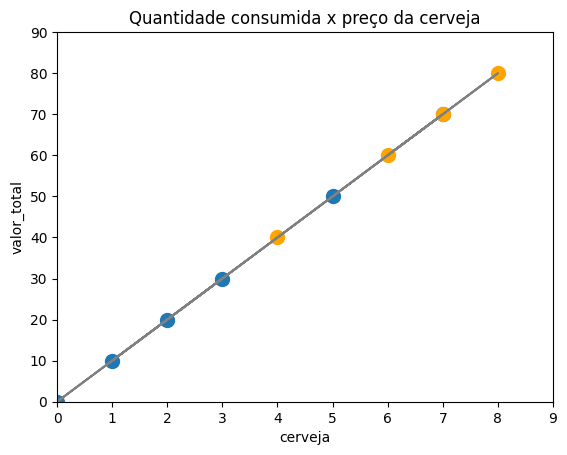

In [ ]:
df.plot(
    kind='scatter', # tipo do gráfico
    x='cerveja', # eixo x
    y='valor_total', # eixo y
    xlim=[0,9], # limite de valores do eixo x
    ylim=[0,90], # limites de valores do eixo y
    s=100, # definindo tamanho dos pontos
    title='Quantidade consumida x preço da cerveja' # título do gráfico
)

novos_dados_entrada.plot(
    kind='scatter',
    x='cerveja',
    y='valor_total',
    ax=plt.gca(), # método para plotar os dois DataFrames no mesmo gráfico
    c='orange',
    s=100
)


# Gráfico de linha para vermos a reta da equação
plt.plot(juncao_dados['cerveja'], # eixo x
         juncao_dados['valor_total'], # eixo y
         color='grey'); # cor da linha